# Chapter 4: Training Models

Link to notes... https://www.notion.so/O-Reilly-Hands-On-ML-Book-Curriculum-d6952ef1dd914ed19553a6235d0ee948

## Linear Regression

In [1]:
# Let's generate some linear looking data
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

In [2]:
# Now let us compute theta-hat using the Normal Equation
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.46562797],
       [3.0209276 ]])

In [4]:
# Now we can make predictions using the same
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.46562797],
       [10.50748318]])

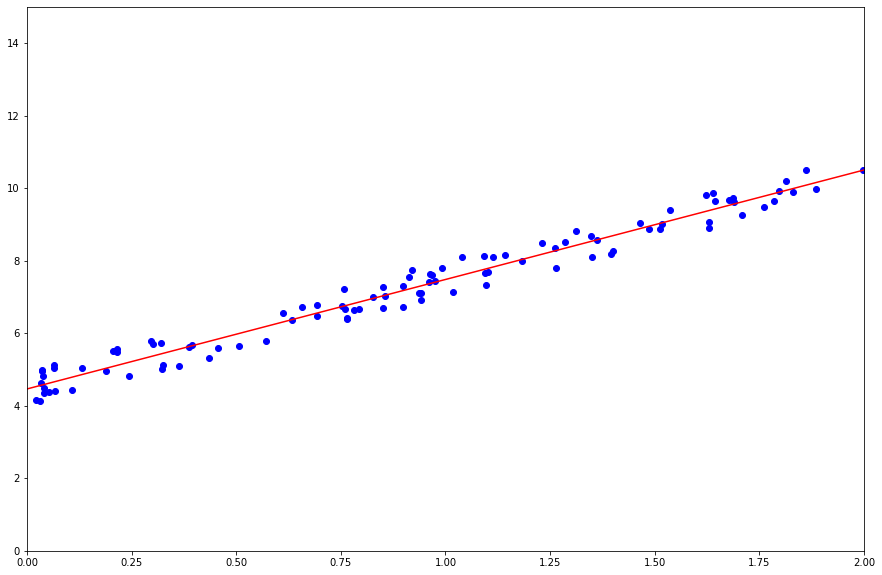

In [16]:
# Let's Plot the model predicitons
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.plot(X_new, y_predict, "r-")
plt.scatter(X, y, c="b")
plt.axis([0, 2, 0, 15])
plt.show();

In [17]:
# Performing Linear Regression using Scikit-Learn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
lr.intercept_, lr.coef_

(array([4.46562797]), array([[3.0209276]]))

In [18]:
lr.predict(X_new)

array([[ 4.46562797],
       [10.50748318]])

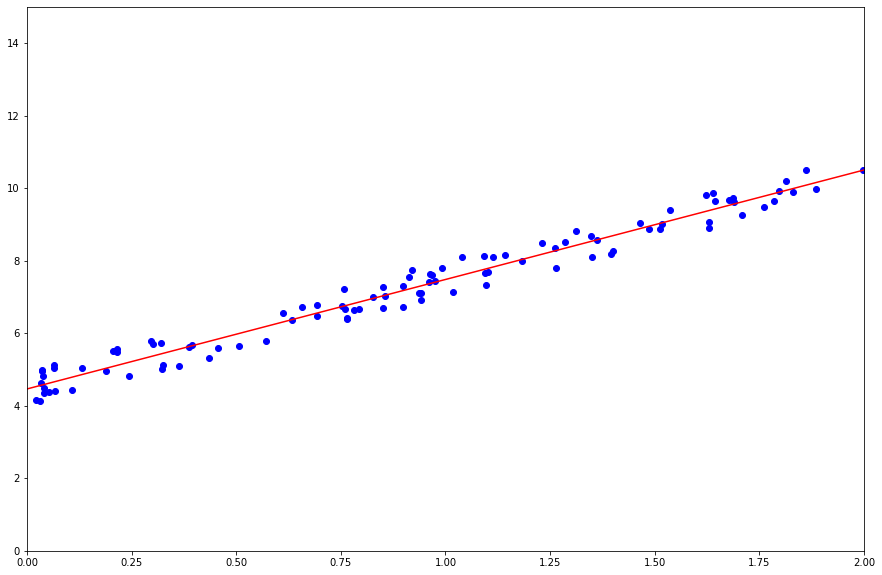

In [19]:
# Plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(X_new, lr.predict(X_new), "r-")
plt.scatter(X, y, c="b")
plt.axis([0, 2, 0, 15])
plt.show();

In [20]:
# It is the same equation as above done manually.